**1. Importing Dependencies**

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


**2. Data Loading and Understanding**

In [39]:
#read csv data to a panda dataframe
df=pd.read_csv("train.csv")

Initial Inspection

In [40]:
df.shape

(800, 22)

In [41]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [42]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [43]:
# In some cases when there is large no. of columns , it might not show all columns and hide some so to see all columns
# pd.set_option('display.max_columns',None)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [45]:
df['age']=df['age'].astype(int)

In [46]:
num_col=['age','result','ID']
for col in df.columns:
    if col not in num_col:
       print(col,df[col].unique())
       print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [47]:
# Drooping ID nad age_desc column as they are of no use since ID is not useful and age has only one value 18 and above for the whole dataseet 
#so it is not going to affect our result hence we are dropping age column
df=df.drop(columns=['ID','age_desc'])

In [49]:
df.shape

(800, 20)

In [50]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [51]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [54]:
#define the mapping dictionary for country names
mapping={
    "Viet Nam": "VietNam",
    "AmericanSamoa":"United States",
    "Hong Kong":"China"
}

#Replace value in the country column
df['contry_of_res']=df['contry_of_res'].replace(mapping)

In [55]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'VietNam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [56]:
# target column distribution
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**INSIGHTS:**
1. We had some missing values in ethnicity and relation column -> handle later
2. age_desc column has only 1 unique value so it is removed as it is not important for prediction
3. Fixed the country names
4. Identified class imbalance in the target column


**3. Exploratory Data Analysis (EDA)**

In [57]:
df.shape

(800, 20)

In [58]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

df.head(2)

In [60]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical Columns:
- Age
- Result

In [65]:
# Set the desired theme 
sns.set_theme(style='darkgrid')

Distribution Plots


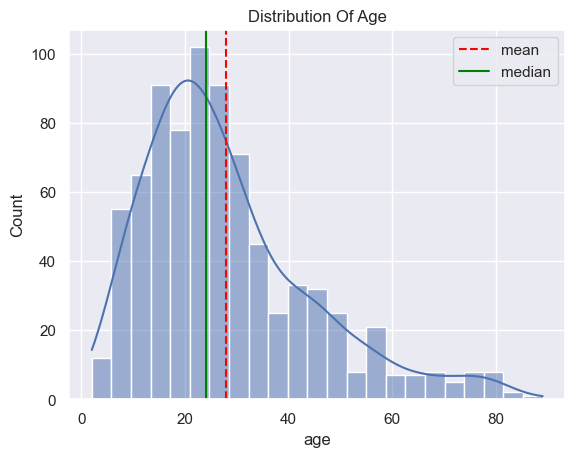

In [68]:
# Histogram for "age"

sns.histplot(df['age'],kde=True)
plt.title("Distribution Of Age")

# calculate the mean and median
age_mean=df['age'].mean()
age_median=df['age'].median()

#Add vertical lines for mean and mesian
plt.axvline(age_mean,color='red', linestyle='--', label='mean')
plt.axvline(age_median,color='green', linestyle='-', label='median')

plt.legend()
plt.show()

Right skewed graph , Hence mean>median

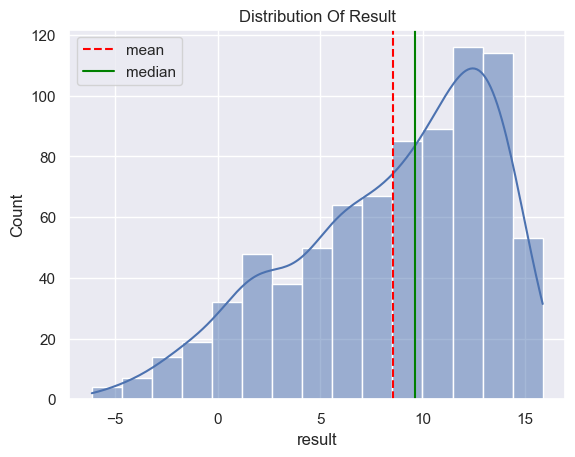

In [69]:
# Histogram for "result"


sns.histplot(df['result'],kde=True)
plt.title("Distribution Of Result")

# calculate the mean and median
result_mean=df['result'].mean()
result_median=df['result'].median()

#Add vertical lines for mean and mesian
plt.axvline(result_mean,color='red', linestyle='--', label='mean')
plt.axvline(result_median,color='green', linestyle='-', label='median')

plt.legend()
plt.show()

Left Skewed graph
hence, mean< median

**Box Plot for identifying outliers in the numerical columns**



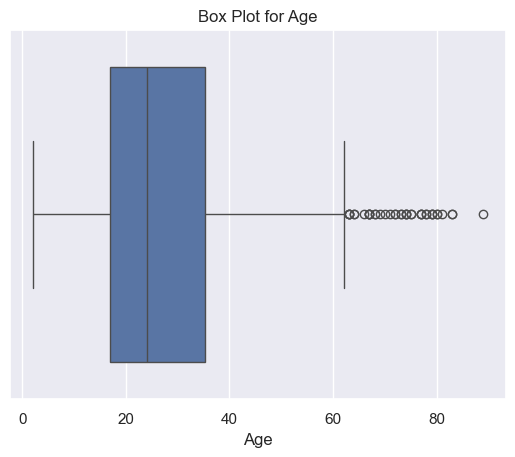

In [70]:
# Box Plot for 'age'

sns.boxplot(x=df['age'])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()


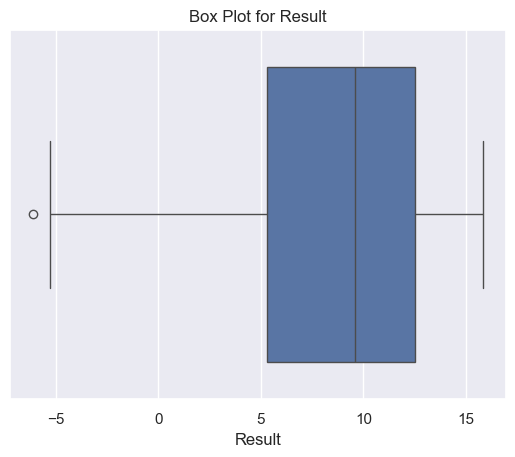

In [71]:
# Box Plot for 'result'

sns.boxplot(x=df['result'])
plt.title("Box Plot for Result")
plt.xlabel("Result")
plt.show()


In [72]:
# Count the outliers for 'age' using IQR method

Q1= df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
age_outliers = df[(df['age']<lower_bound) | (df['age']>upper_bound)]


In [75]:
# mean gets affected by outliers but median does not get affected by outliers 
#so later we will replace these outliers by median values and not by mean values

len(age_outliers)

39

In [77]:
# Count the outliers for 'result' using IQR method

Q1= df['result'].quantile(0.25)
Q3=df['result'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
result_outliers = df[(df['result']<lower_bound) | (df['result']>upper_bound)]


In [78]:
len(result_outliers)

1

Categorical Columns                

In [80]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

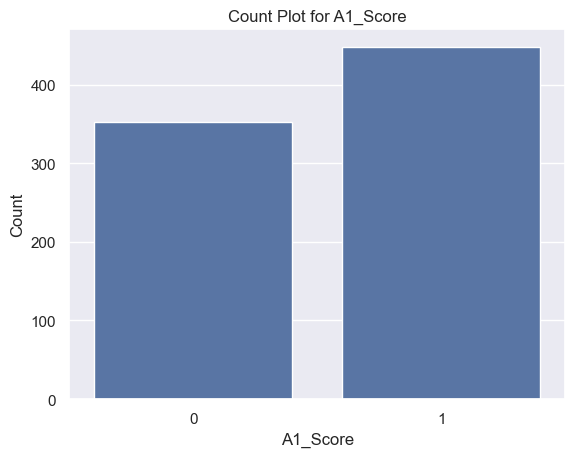

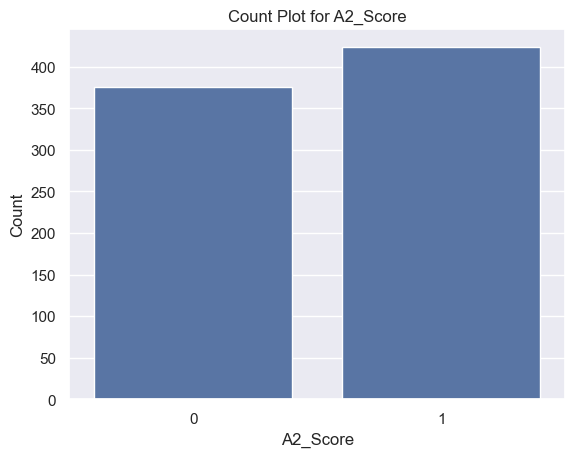

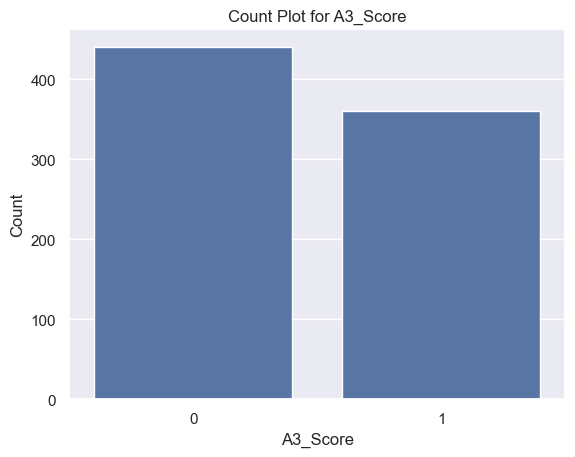

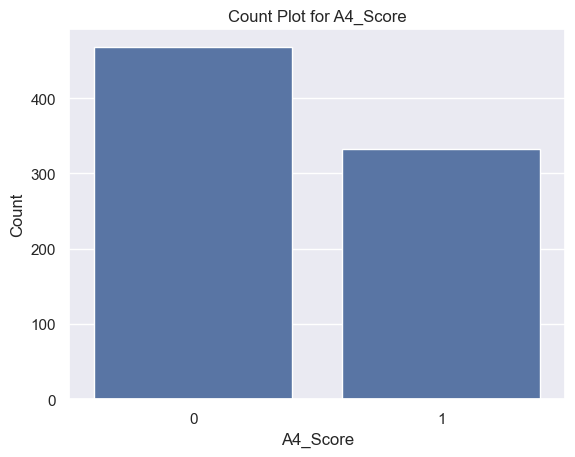

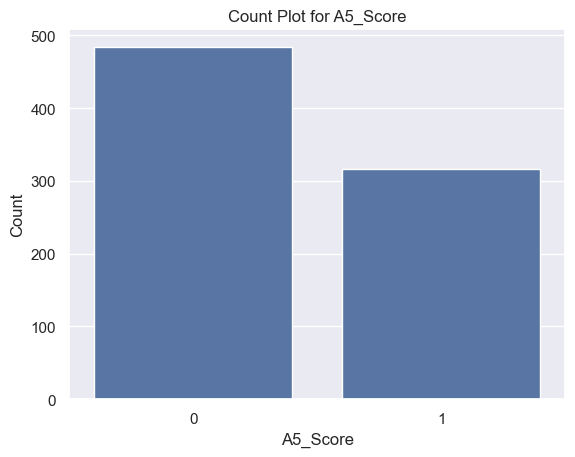

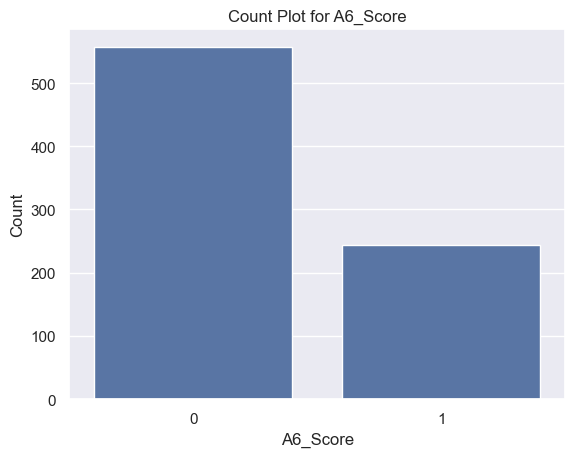

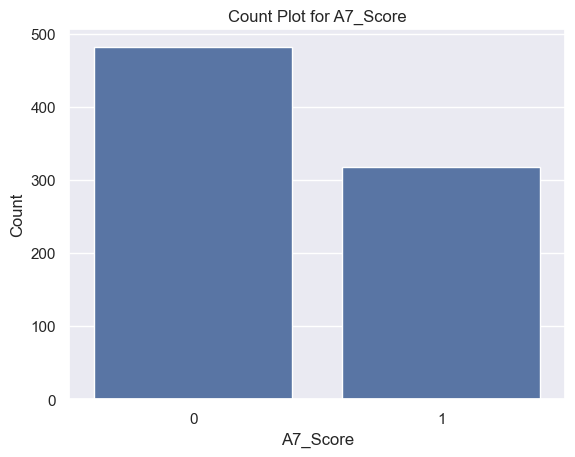

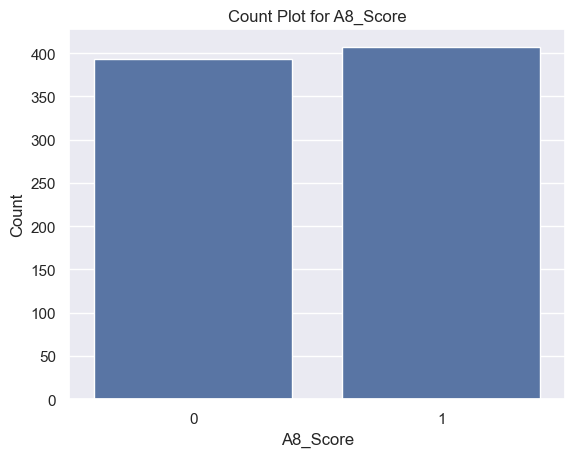

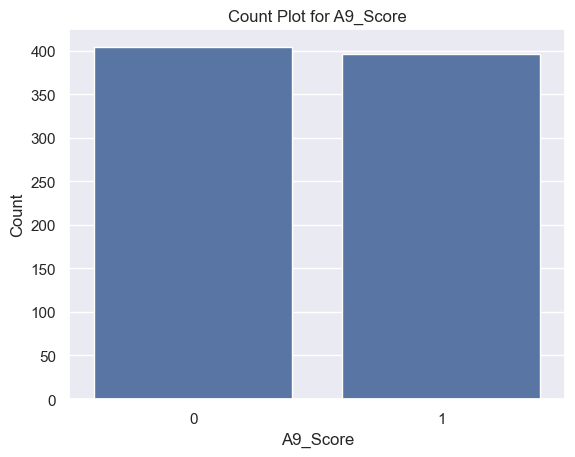

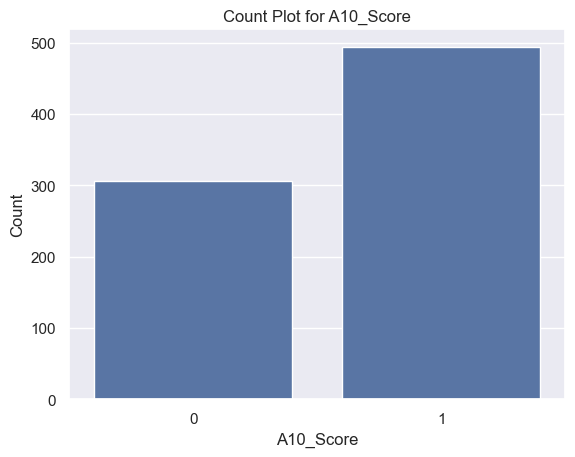

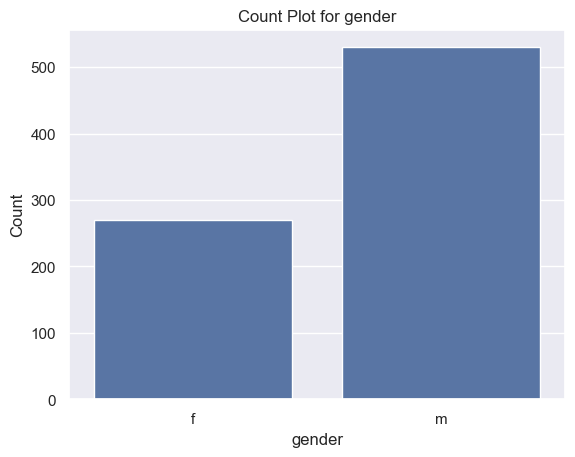

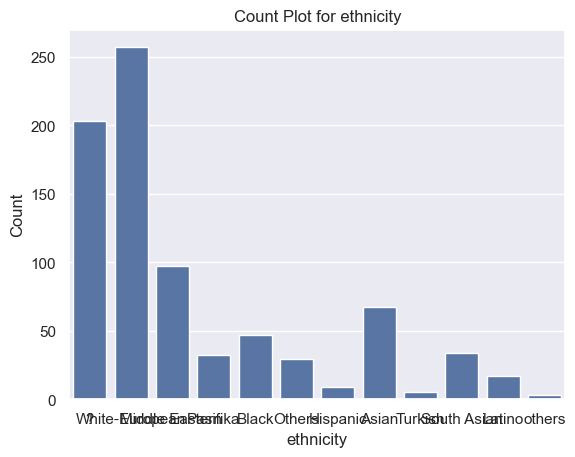

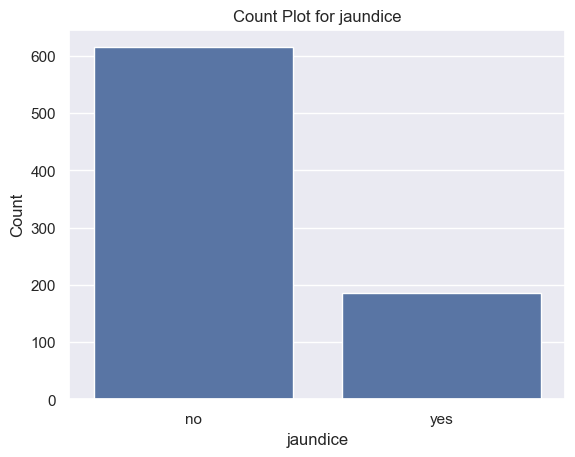

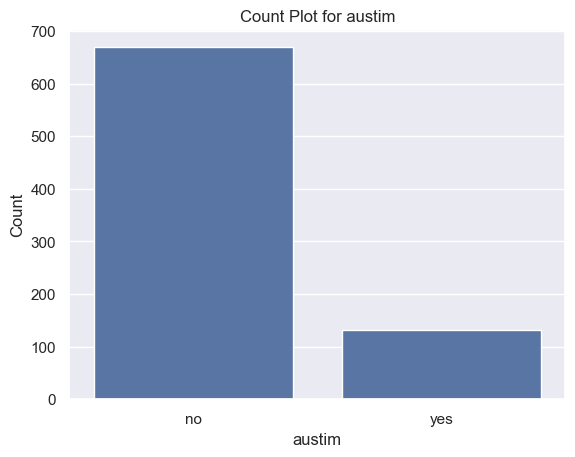

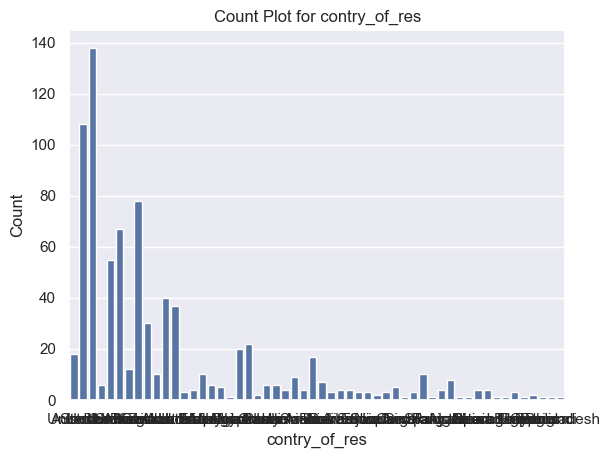

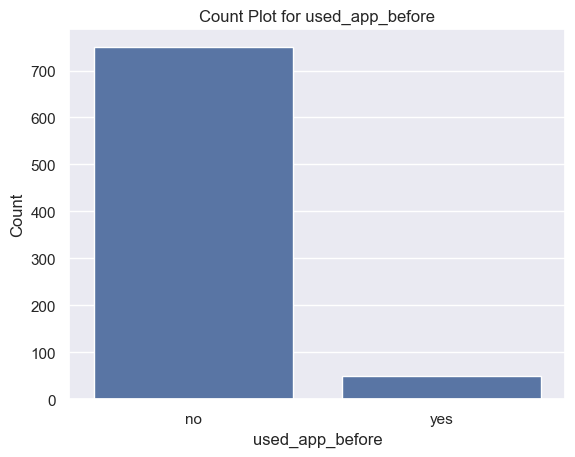

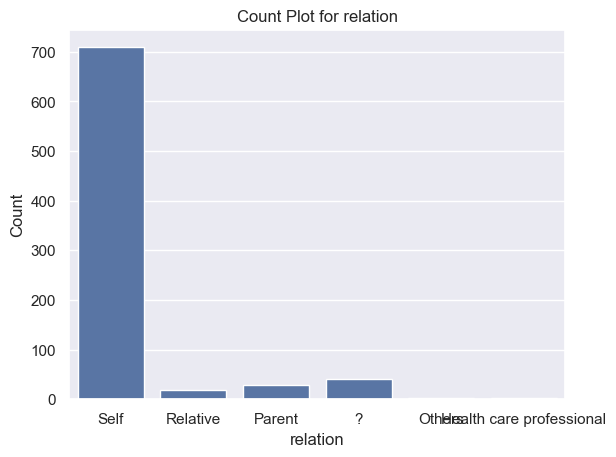

In [81]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','gender', 'ethnicity', 'jaundice', 'austim',
                    'contry_of_res', 'used_app_before','relation' ]

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

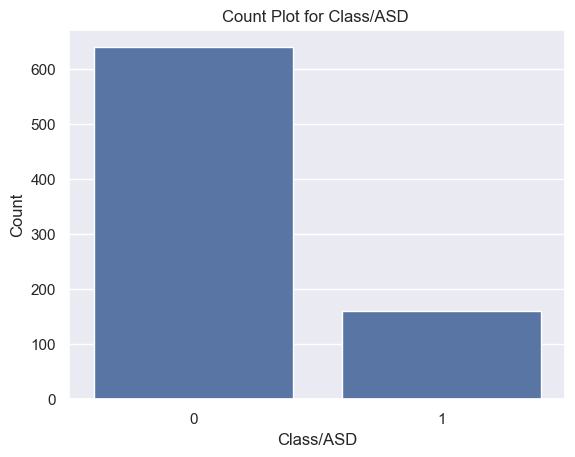

In [84]:
# Count plot for target column (Class/ASD)
sns.countplot(x=df['Class/ASD'])
plt.title("Count Plot for Class/ASD ")
plt.xlabel("Class/ASD")
plt.ylabel('Count')
plt.show()

In [87]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Handling missing values(which are present in the form of "?") in ethnicity and relation**


In [88]:
df['ethnicity']=df['ethnicity'].replace({
    "?":"Others",
    "others":"Others"
})
df['relation']=df['relation'].replace({
    "?":"Others",
    "Relative":"Others",
    "Parent":"Others",
    "Health care professional":"Others",
})

In [90]:
df['ethnicity'].unique()


array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [91]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

**Label Encoding** </br>
(usually performed in data preprocessing step but for heatmaps we need to do it right now)

In [92]:
# identify columns with object datatype
object_columns= df.select_dtypes(include=["object"]).columns

In [93]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [94]:
# Initialise a dictionary to store the encoders
encoders={}

# Apply label encoding and store the encoders
for col in object_columns:
    label_encoder= LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])
    encoders[col]=label_encoder    # saving the encoder for this column

# Save the encodrs as a pickly file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [95]:
encoders


{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [96]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Bivariate Analysis**

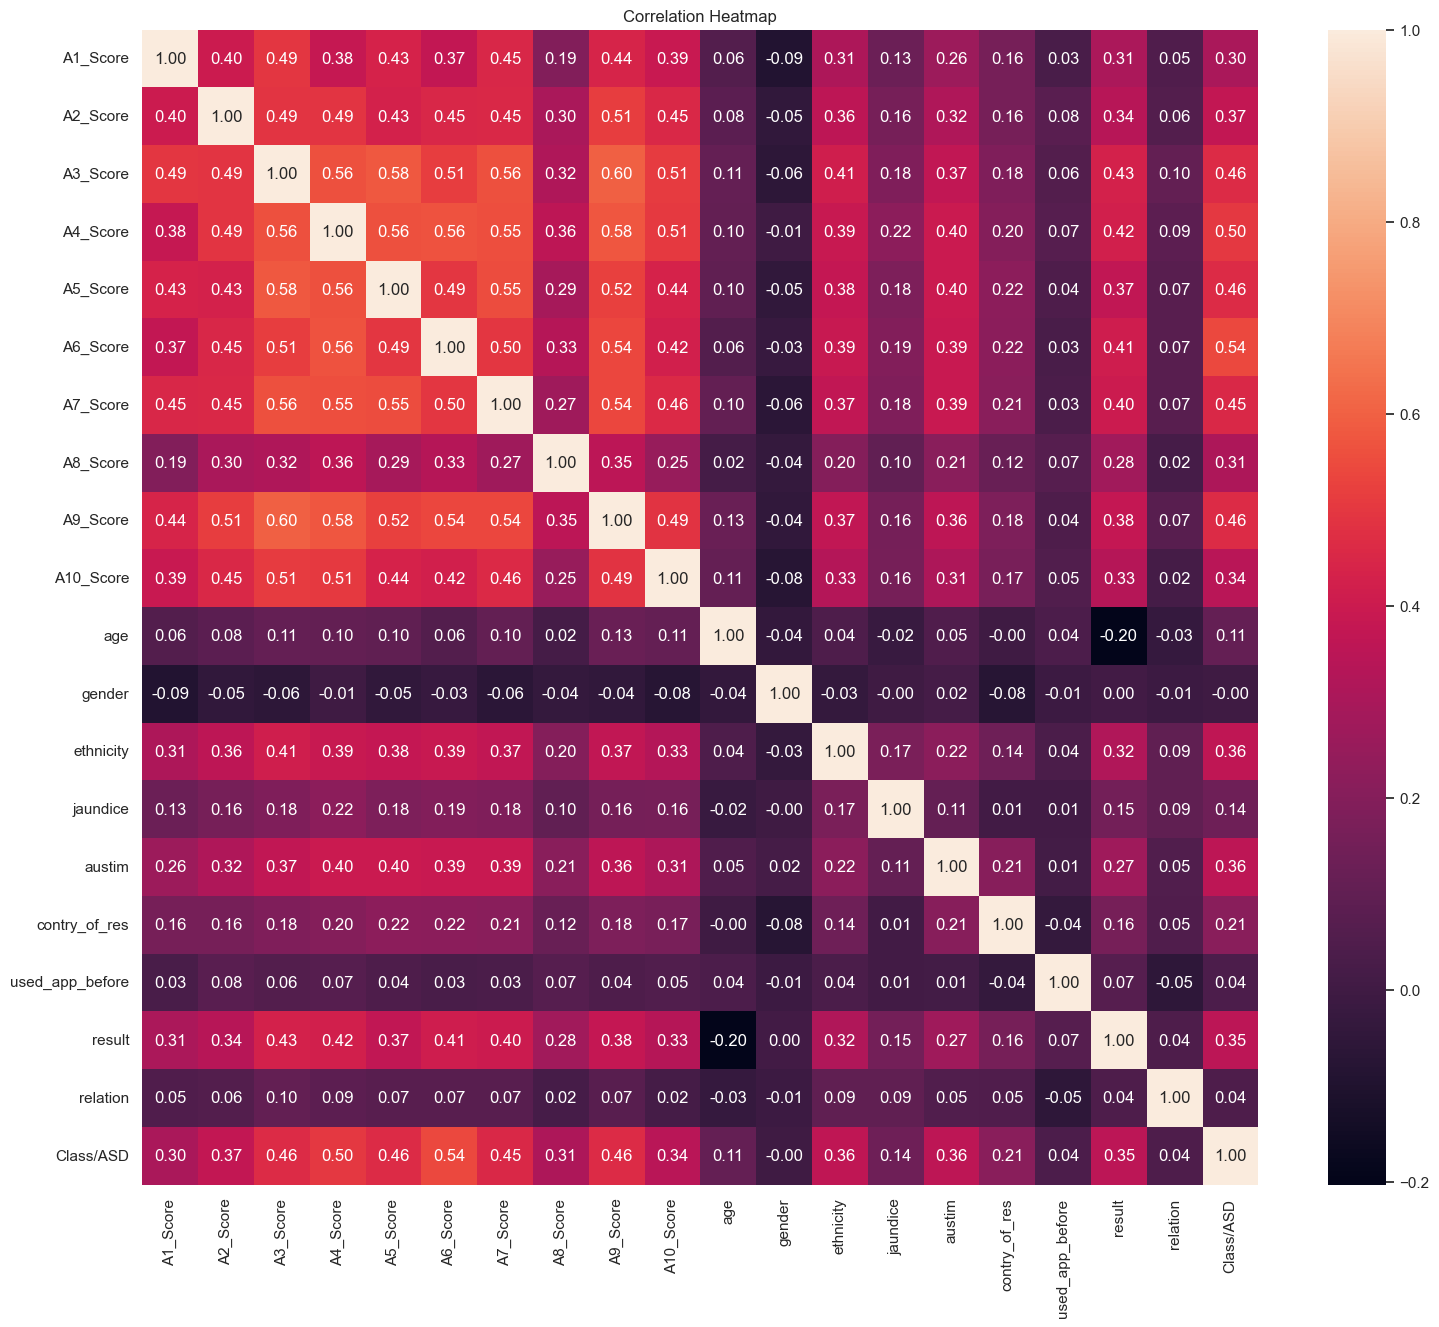

In [100]:
# Correlation Heatmap
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**INSIGHTS From EDA:**
- There are few outliers in the numerical columns(age, results)
- There is a class imbalance in the target column
- There is a class imbalance in some categorical features
- We don't have any highly correlated column so we didn't drop any column
- Performed label encoding and saved the encoders

**4. Data preprocessing**

Handling the outliers

In [101]:
# Function to replace the outlers with median value
def replace_outliers_with_median(df,column):
    Q1= df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    median= df[column].median()

    # Replace outlers with median value
    df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)

    return df

In [102]:
# Replace outliers in the 'age' column
df= replace_outliers_with_median(df,'age')

# Replace outliers in the 'result' column
df= replace_outliers_with_median(df,'result')

In [103]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [104]:
df.shape

(800, 20)

**Train Test Split**

In [105]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [106]:
X= df.drop(columns=['Class/ASD'])
y=df['Class/ASD']


In [110]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
y_train.shape

(640,)

In [112]:
y_test.shape

(160,)

In [113]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [114]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

**Synthetic Minority Oversampling Technique : SMOTE**

In [115]:
smote= SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [116]:
y_train_smote.shape

(1030,)

In [117]:
y_train_smote.value_counts()

Class/ASD
1    515
0    515
Name: count, dtype: int64

**5. Model Training**

In [118]:
# Dictionary of classifiers 
models={
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [134]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    scores= cross_val_score(model, X_train_smote, y_train_smote, cv=5,scoring="accuracy")
    cv_scores[model_name]=scores
    print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters...
Decision Tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [135]:
cv_scores

{'Decision Tree': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'Random Forest': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

**6. Model Selection & Hyperparameter Tuning**

In [155]:
# Initialising models

decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [156]:
# Hyperparameter grids for RandomizedSearchCV

param_grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth":[None, 10,20,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

param_grid_rf = {
    "n_estimators" : [50,100,200,500],
    "max_depth":[None, 10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap": [True, False]
}

param_grid_xgb = {
    "n_estimators" : [50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [157]:
# Hyperparameter Tuning for three tree based models

# the below steps can be automated using for loop or by using a pipeline
                                                                 
# perform RandomisedSearchCV
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt,n_iter=20,cv=5, scoring="accuracy", random_state=42)
random_search_rf= RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf,n_iter=20,cv=5, scoring="accuracy", random_state=42)
random_search_xgb= RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb,n_iter=20,cv=5, scoring="accuracy", random_state=42)


In [158]:
# Fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [159]:
best_model= None
best_score = 0
if random_search_dt.best_score_ > best_score:
    best_model= random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
    best_model= random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model= random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_

In [181]:
print(f"Best Model:{best_model}")
print(f" Best Cross Validation Accuracy: {best_score:.2f}")

Best Model:RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
 Best Cross Validation Accuracy: 0.93


In [184]:
# Save the best model 
model_data={"model": best_model , "feature_names": X.columns.to_list()}
with open("best_model.pkl","wb") as f:
    pickle.dump(model_data,f)

**7. Model Evaluation**

In [185]:
# Evaluate on Test Data
y_test_pred = best_model.predict(X_test)
print("Accuracy Score:\n", accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy Score:
 0.81875
Confusion Matrix:
 [[108  16]
 [ 13  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       124
           1       0.59      0.64      0.61        36

    accuracy                           0.82       160
   macro avg       0.74      0.75      0.75       160
weighted avg       0.82      0.82      0.82       160



**8. Load the saved model and build a predictive system**

In [186]:
# Load the saved model and feature names
with open("best_model.pkl","rb") as f:
    model_data=pickle.load(f)

    loaded_model= model_data['model']
    feature_names= model_data['feature_names']

In [187]:
print(loaded_model)

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)


In [188]:
print(feature_names)

['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'relation']


In [189]:
input_data = {
    "A1_Score": 1,
    "A2_Score": 1,
    "A3_Score": 0,
    "A4_Score": 1,
    "A5_Score": 0,
    "A6_Score": 1,
    "A7_Score": 0,
    "A8_Score": 1,
    "A9_Score": 0,
    "A10_Score": 1,
    "age": 38.17274623,
    "gender": "f",
    "ethnicity": "Others",
    "jaundice": "no",
    "austim": "no",
    "contry_of_res": "Austria",
    "used_app_before": "no",
    "result": 6.351165589,
    "relation": "Self"
}


In [190]:
input_data_df= pd.DataFrame([input_data])
input_data_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,1,0,1,0,1,0,1,0,1,38.172746,f,Others,no,no,Austria,no,6.351166,Self


In [191]:
with open("encoders.pkl","rb") as f:
    encoders=pickle.load(f)
# encode categorical features using the saved label encoder
for column, encoder in encoders.items():
    input_data_df[column]=encoder.transform(input_data_df[column])

In [192]:
input_data_df

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,1,0,1,0,1,0,1,0,1,38.172746,0,5,0,0,6,0,6.351166,1


In [193]:
# Make a prediction
prediction= loaded_model.predict(input_data_df)
pred_prob= loaded_model.predict_proba(input_data_df)
print(prediction)

# Results
print(f" Prediction: {'Autistic' if prediction[0]==1 else 'Not Autistic'}")
print(f"Prediction Probability: {pred_prob}")

[0]
 Prediction: Not Autistic
Prediction Probability: [[0.62 0.38]]
